In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, 'C:\\Users\\turnerevansd\\Documents\\Python Scripts\\FIBSEM')
import neuPrintFunctions as nPF

## Set up password for neuPrint server (need to paste in your token each time)
import getpass

SERVER = 'emdata1.int.janelia.org:11000'
TOKEN = getpass.getpass()

## Connect to the neuPrint server
from neuprint import Client

c = Client(SERVER, TOKEN)
c.fetch_version()

········


{'Version': '1.0'}

In [138]:
## Specify the type names and bodyIds

## Set thresholds for synapse counts
minSyns = 3

# E-PGs
EPGIds = nPF.typeIds(c, "PB08")
EPGLabels = nPF.typeLabels(c, "PB08")
EPG = nPF.neuronType()
EPG.name = 'EPG'
EPG.regions = ['PB','EB','GA','All']
for nID in range(0, len(EPGIds)):
    EPG.neurons[nID] = nPF.popNeuInst( c, EPGIds[nID], EPGLabels[nID],EPG.regions, minSyns )
    
# P-ENs
PEN1Ids = nPF.typeIds(c, "PB06a")
PEN1Labels = nPF.typeLabels(c, "PB06a")
PEN1 = nPF.neuronType()
PEN1.name = 'PEN1'
PEN1.regions = ['PB','EB','NO','All']
for nID in range(0, len(PEN1Ids)):
    PEN1.neurons[nID] = nPF.popNeuInst( c, PEN1Ids[nID], PEN1Labels[nID], PEN1.regions, minSyns )

PEN2Ids = nPF.typeIds(c, "PB06b")
PEN2Labels = nPF.typeLabels(c, "PB06b")
PEN2 = nPF.neuronType()
PEN2.name = 'PEN2'
PEN2.regions = ['PB','EB','NO','All']
for nID in range(0, len(PEN2Ids)):
    PEN2.neurons[nID] = nPF.popNeuInst( c, PEN2Ids[nID], PEN2Labels[nID], PEN2.regions, minSyns )
    
# P-EGs
PEGIds = nPF.typeIds(c, "PB07")
PEGLabels = nPF.typeLabels(c, "PB07")
PEG = nPF.neuronType()
PEG.name = 'PEG'
PEG.regions = ['PB','EB','GA','All']
for nID in range(0, len(PEGIds)):
    PEG.neurons[nID] = nPF.popNeuInst( c, PEGIds[nID], PEGLabels[nID], PEG.regions, minSyns )
    
# Delta 7s
D7Ids = nPF.typeIds(c, "PB15")
D7Labels = nPF.typeLabels(c, "PB15")
D7 = nPF.neuronType()
D7.name = 'D7'
D7.regions = ['PB','All']
for nID in range(0, len(D7Ids)):
    D7.neurons[nID] = nPF.popNeuInst( c, D7Ids[nID], D7Labels[nID], D7.regions, minSyns ) 
    
# ExR4
ExR4Ids = nPF.typeIds(c, "ExR4")
ExR4Labels = nPF.typeLabels(c, "ExR4")
ExR4 = nPF.neuronType()
ExR4.name = 'ExR4'
ExR4.regions = ['LAL','EB','GA','All']
for nID in range(0, len(ExR4Ids)):
    ExR4.neurons[nID] = nPF.popNeuInst( c, ExR4Ids[nID], ExR4Labels[nID], ExR4.regions, minSyns )
    
# R6
R6Ids = nPF.typeIds(c, "R6")
R6Labels = nPF.typeLabels(c, "R6")
R6 = nPF.neuronType()
R6.name = 'R6'
R6.regions = ['','EB','GA','All']
for nID in range(0, len(R6Ids)):
    R6.neurons[nID] = nPF.popNeuInst( c, R6Ids[nID], R6Labels[nID], R6.regions, minSyns )

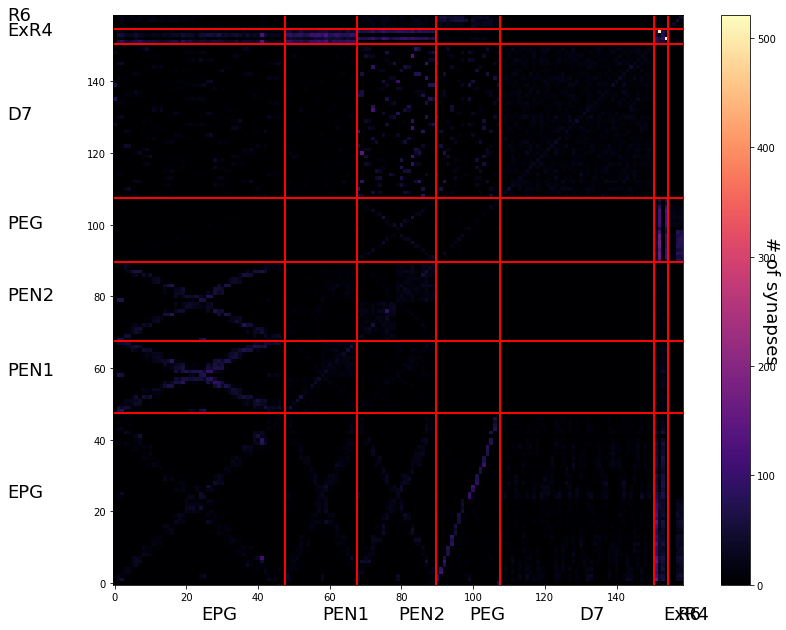

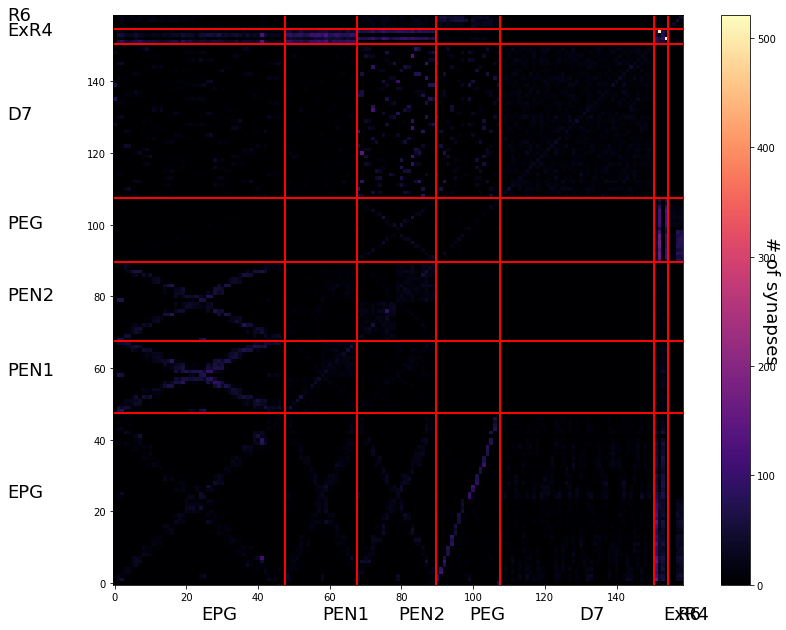

In [173]:
# List the presynaptic types
typeArrayPre = [EPG,PEN1,PEN2,PEG,D7,ExR4,R6]
typeArrayPost = [EPG,PEN1,PEN2,PEG,D7,ExR4,R6]
(connMat, allPreBodyIds, allPreLabels, allPostBodyIds, allPostLabels, totPSDs) = nPF.connMatFill( typeArrayPre, typeArrayPost, 'All')
nPF.connMatPltCounts( typeArrayPre, typeArrayPost, connMat)

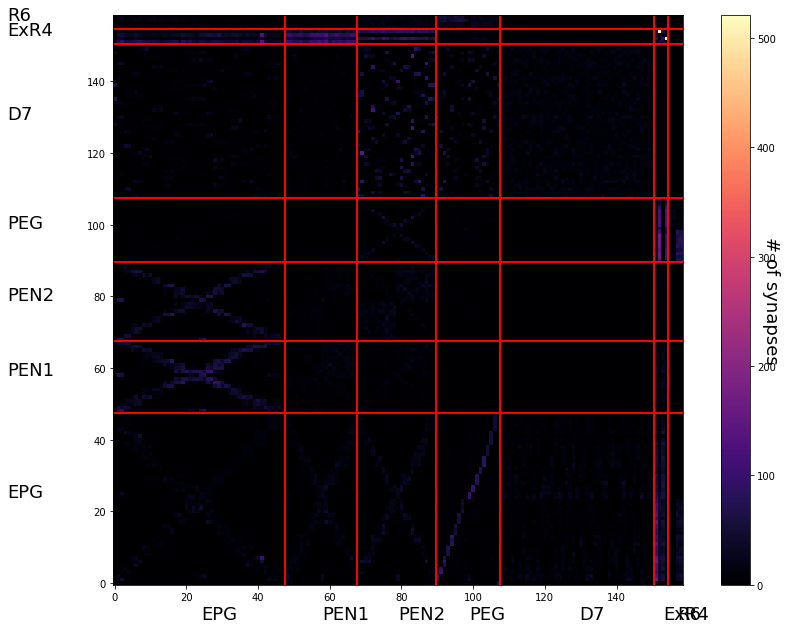

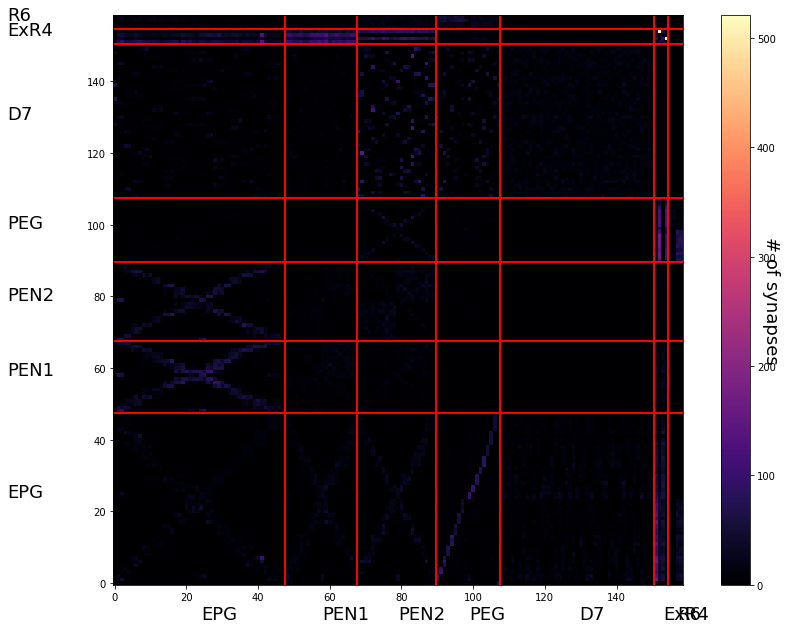

In [167]:
# Remove any autapses from the weight matrix
for aRemov in range(0,len(connMat)):
    connMat[aRemov,aRemov] = 0
    
# For neurons where the gall is cut off, replace the empty R connections with their symmetric L counterpart

# Each neuron of a given class that arborize in the same PB glom. have the same name.
# We only want to look at one of them
lastName = '' 

# Step through the presynaptic neurons
for preN in range(0,len(allPreLabels)):
    # Choose only the neurons that have arbors in the left GA
    if ((allPreLabels[preN].find('E-PG') != -1 or 
        allPreLabels[preN].find('P-EG') != -1 or 
        allPreLabels[preN].find('ExR4') != -1 or
        allPreLabels[preN].find('R6(ring)') != -1) and
        (allPreLabels[preN].find('_L') != -1)):
        
        # Check to see if we've already seen one of this name before.
        if allPreLabels[preN] == lastName:
            continue
        else:
            # Find the indices for all neurons with this given name and of their right counterpart
            nronIndices = [i for i,x in enumerate(allPreLabels) if x==allPreLabels[preN]]
            cPart = allPreLabels[preN].replace('_L','_R')
            nronIndicesCPart = [i for i,x in enumerate(allPreLabels) if x==cPart]
        
        # Step through the postsynaptic neurons
        lastNamePost = ''
        for postN in range(0,len(allPostLabels)):
            if ((allPostLabels[postN].find('E-PG') != -1 or 
                allPostLabels[postN].find('P-EG') != -1 or 
                allPostLabels[postN].find('ExR4') != -1 or
                allPostLabels[postN].find('R6(ring)') != -1) and
                (allPreLabels[postN].find('_L') != -1)):
                
                # Check to see if we've already seen one of this name before.
                if allPostLabels[postN] == lastNamePost:
                    continue
                else:
                    # Find the indices for all neurons with this given name and of their right counterpart
                    nronIndicesPost = [i for i,x in enumerate(allPostLabels) if x==allPostLabels[postN]]
                    cPartPost = allPostLabels[postN].replace('_L','_R')
                    nronIndicesPostCPart = [i for i,x in enumerate(allPostLabels) if x==cPartPost]
                    
                    # If we can't find a counterpart, skip it
                    if nronIndicesPostCPart == [0]:
                        continue
                
                # Find the mean value of the connection strength between partners
                meanConnVal = 0
                for preInd in range(0,len(nronIndices)):
                    for postInd in range(0,len(nronIndicesPost)):
                        meanConnVal = meanConnVal + connMat[nronIndices[preInd],nronIndicesPost[postInd]]
                meanConnVal = meanConnVal/len(nronIndices)/len(nronIndicesPost)
                
                # Fill in that mean value for the counterparts
                for preInd in range(0,len(nronIndicesCPart)):
                    for postInd in range(0,len(nronIndicesPostCPart)):
                        connMat[nronIndicesCPart[preInd],nronIndicesPostCPart[postInd]] = meanConnVal
                
                lastNamePost = allPostLabels[postN]
        
        lastName = allPreLabels[preN]
        
nPF.connMatPltCounts( typeArrayPre, typeArrayPost, connMat)

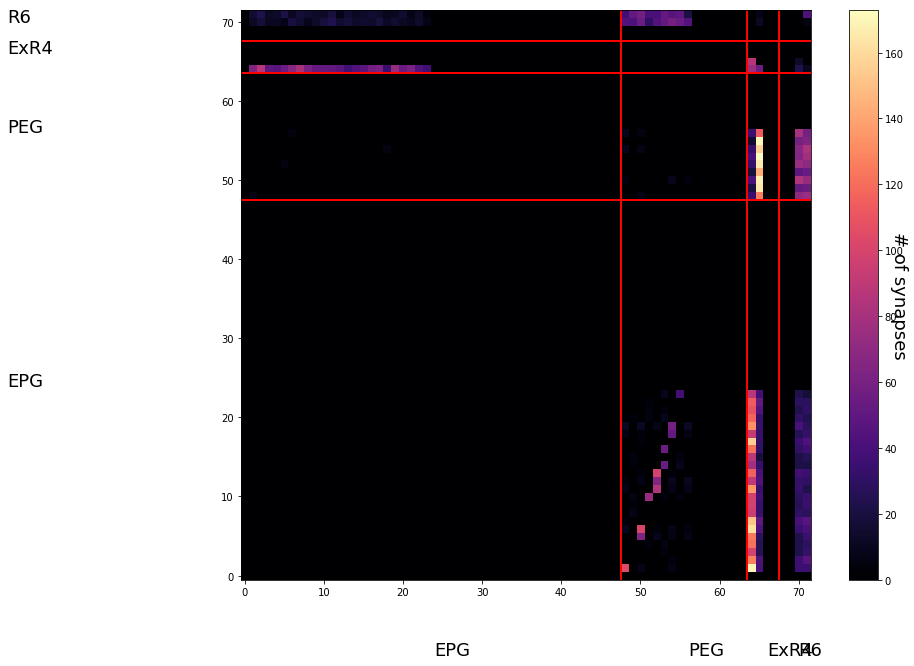

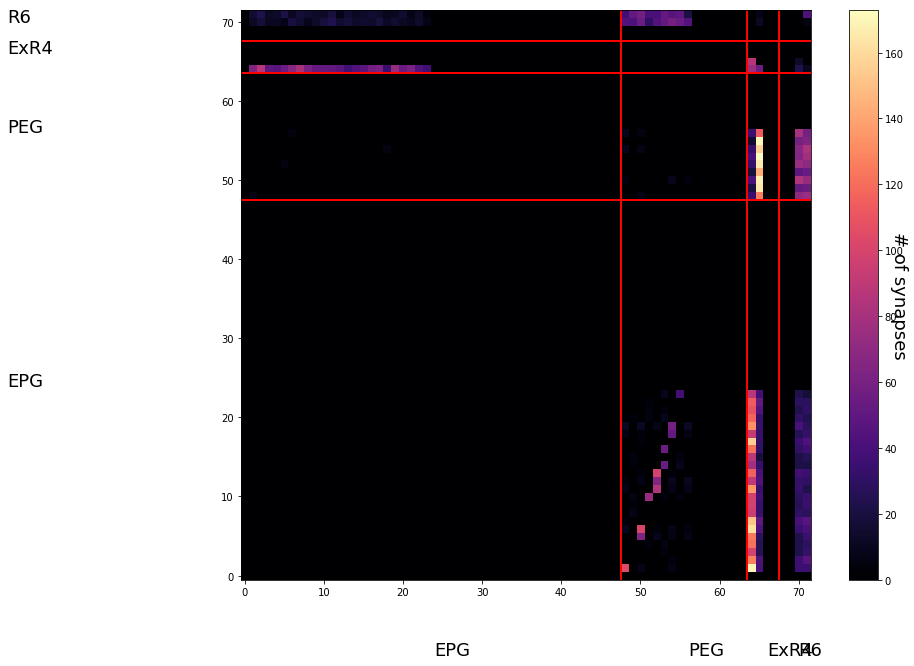

In [137]:
# List the presynaptic types
typeArrayPre = [EPG,PEG,ExR4,R6]
typeArrayPost = [EPG,PEG,ExR4,R6]
(connMatGA, allPreBodyIdsGA, allPreLabelsGA, allPostBodyIdsGA, allPostLabelsGA, totPSDsGA) = nPF.connMatFill( typeArrayPre, typeArrayPost, 2)
nPF.connMatPltCounts( typeArrayPre, typeArrayPost, connMatGA)

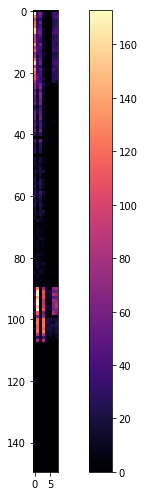

In [174]:
fig = plt.figure(figsize=(11,8.5))
ax = plt.gca()
plt.imshow(connMat[np.ix_(list(range(0,150)),list(range(151,159)))], cmap = plt.get_cmap('magma'))
cbar = plt.colorbar()